In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train.shape

(42000, 785)

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X, y  = train.iloc[:,1:], train['label']
print("X: ",X.shape)
print("y: ",y.shape)

X:  (42000, 784)
y:  (42000,)


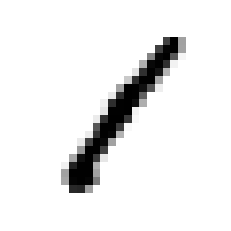

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[[0]]
some_digit_image = some_digit.to_numpy().reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[[0]]

0    1
Name: label, dtype: int64

In [7]:
y.astype(np.uint8)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: uint8

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, plot_roc_curve

def Cross_Val_Predict(model):
    y_probas = cross_val_predict(model,
                     X,
                     y,
                     cv=5,
                     method="predict_proba")
    y_scores = y_probas[:,1]
    fpr, tpe, threshold = roc_curve(y,y_scores)
    plt.plot(fpr,tpr, "b:", label='SGD')
    plot_roc_curve(fpr,tpr)
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X[:1000], y[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])



In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores